<a href="https://colab.research.google.com/github/Tezze2001/brain-tumor-analysis/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset analysis

### Import libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Database

In [18]:
df = pd.read_csv("./Dataset/Brain Tumor.csv")

In [19]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [20]:
df.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

Il dataset è composto unicamente da attributi float

In [21]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


### Analisi del target

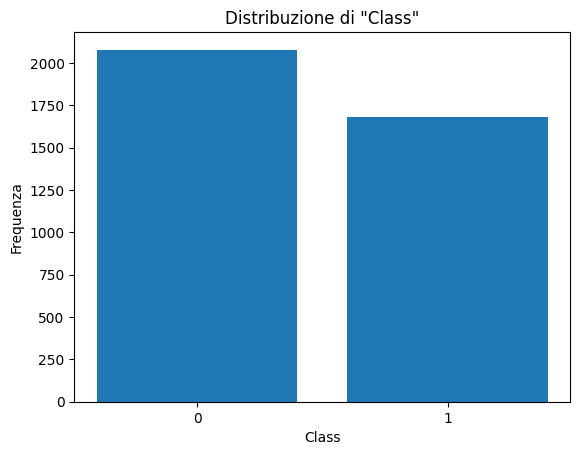

In [22]:
plt.bar(df["Class"].unique(), df["Class"].value_counts())
plt.xlabel("Class")
plt.ylabel("Frequenza")
plt.title("Distribuzione di \"Class\"")
plt.xticks([0, 1])
plt.show()

Il dataset è bilanciato essendo che il target è ben distribuito, non è necessario fare eventuali operazioni di resample o upsample

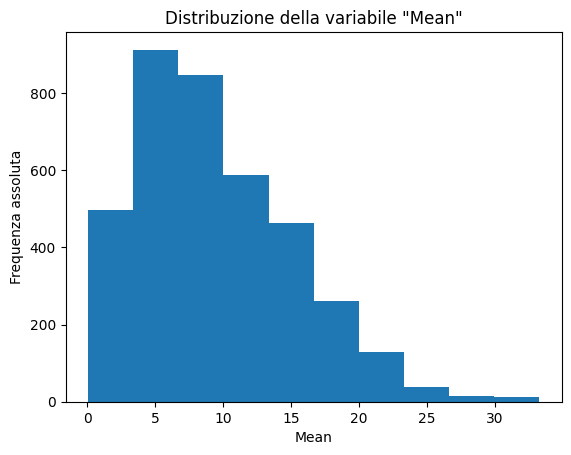

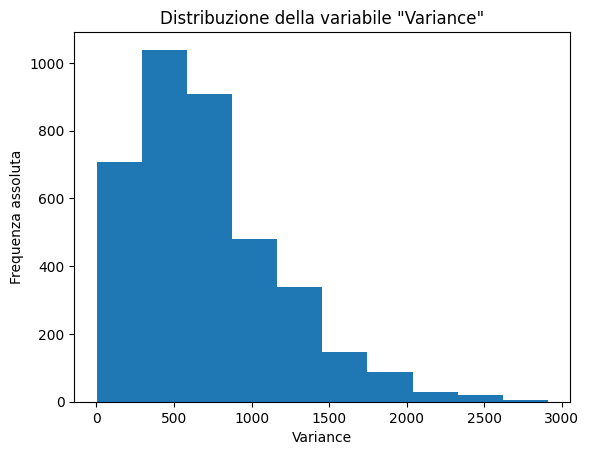

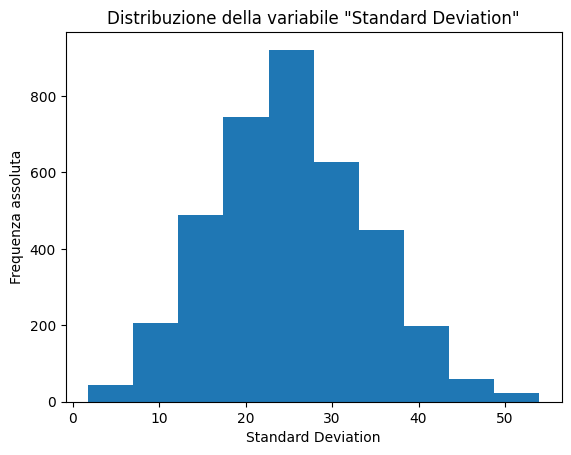

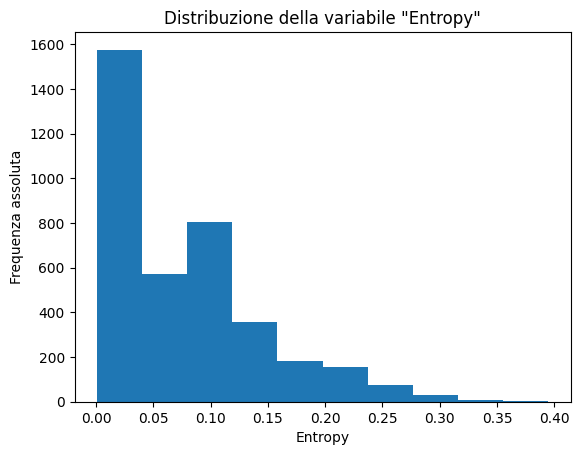

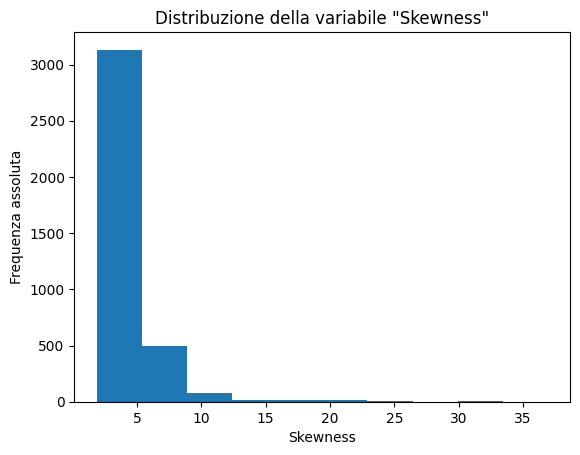

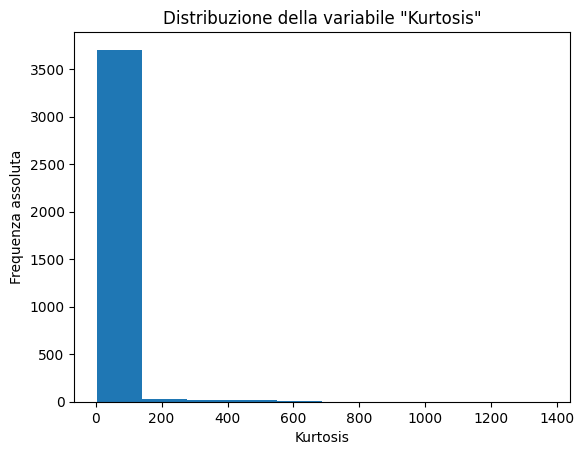

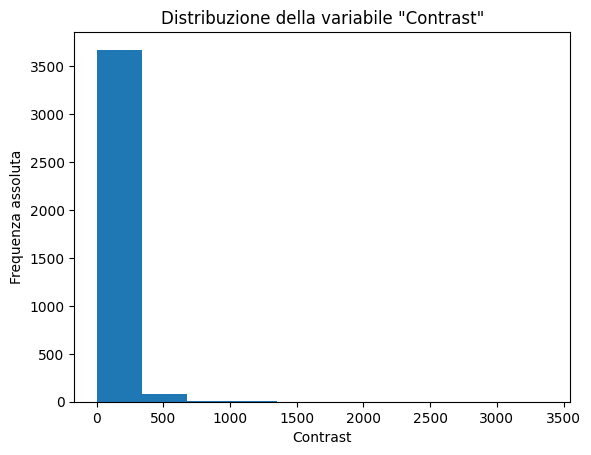

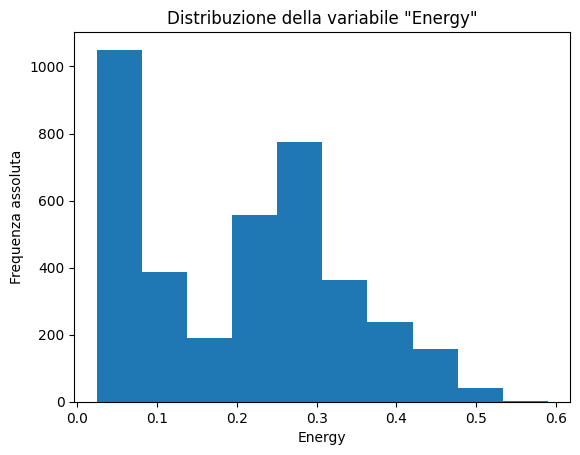

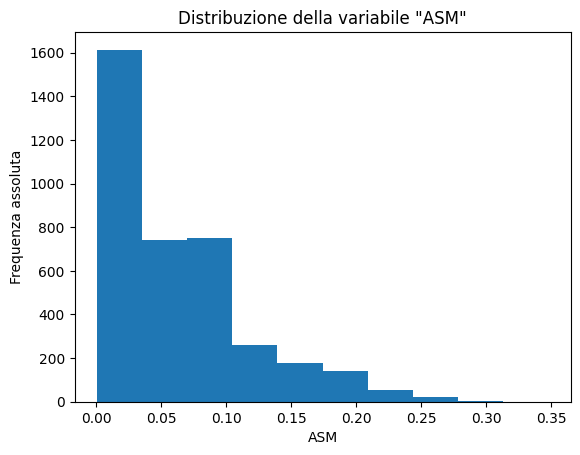

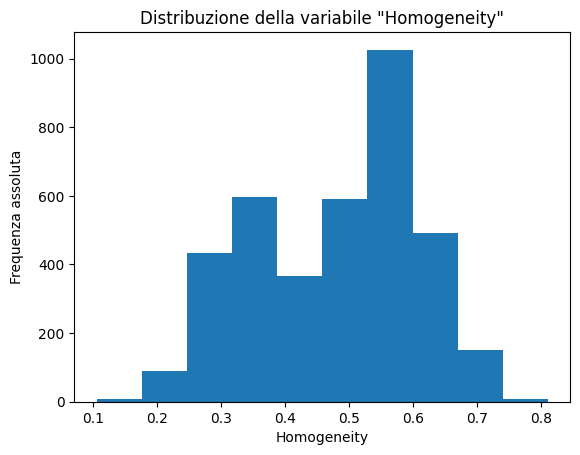

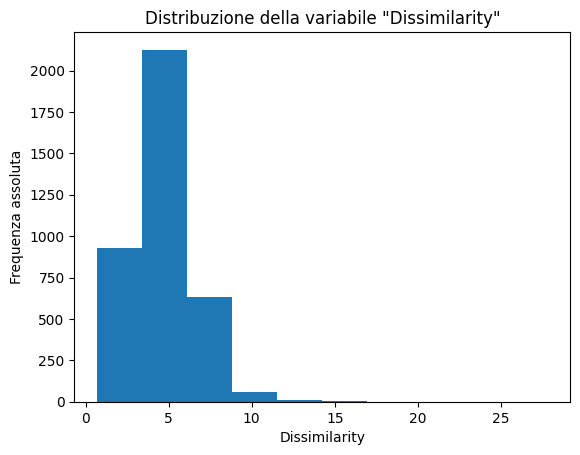

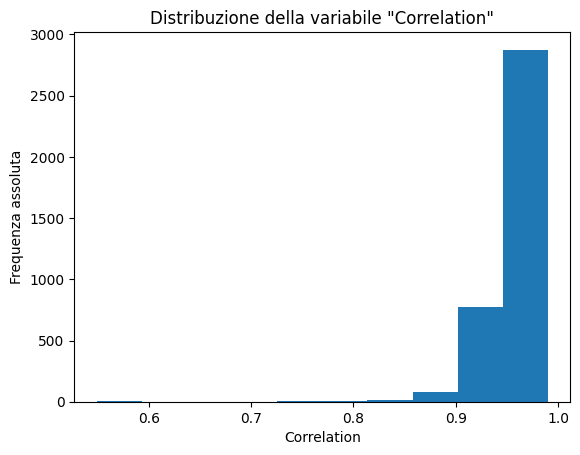

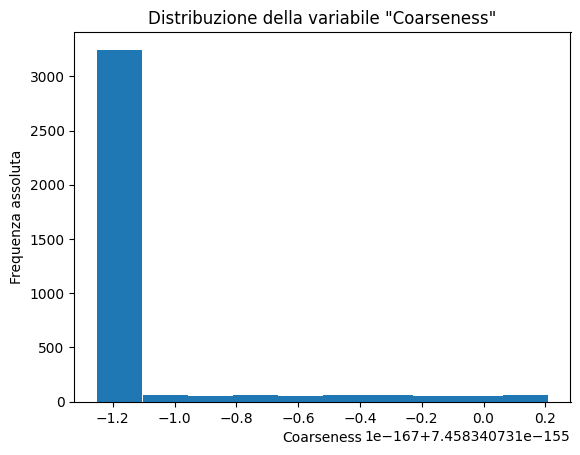

In [26]:
for col_name in df.columns[2:]:
    plt.hist(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel("Frequenza assoluta")
    plt.title("Distribuzione della variabile \"" + col_name + "\"")
    plt.show()

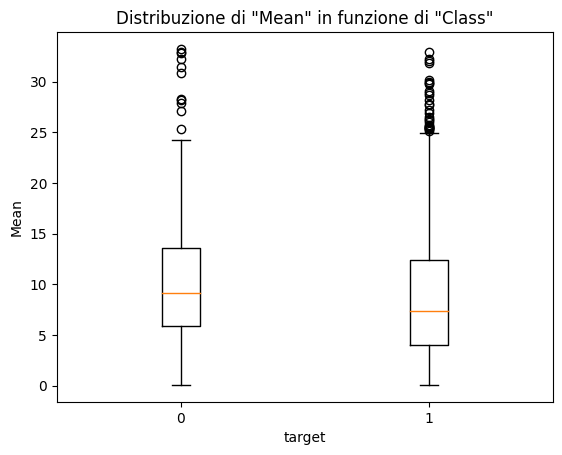

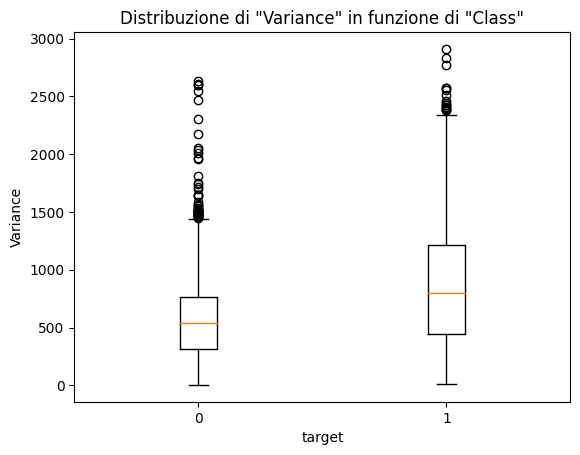

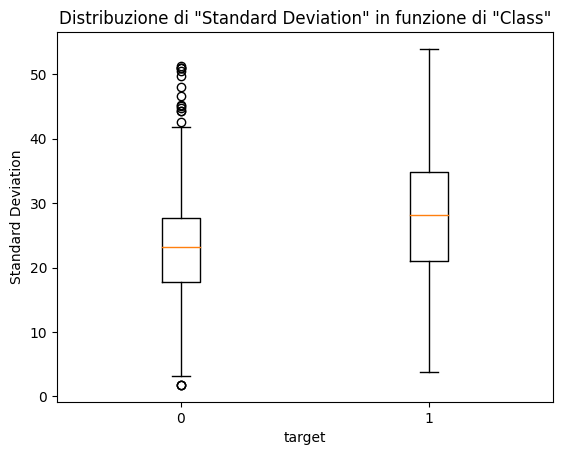

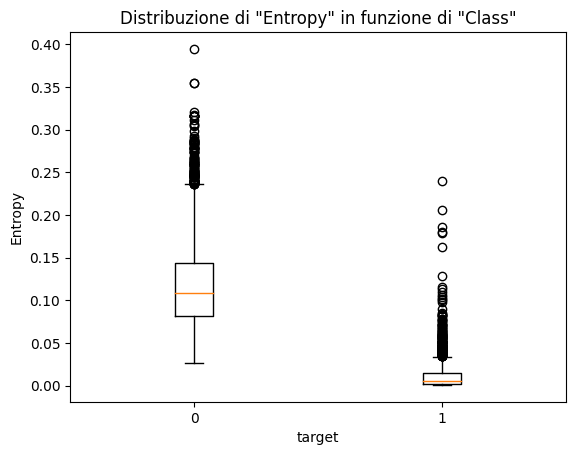

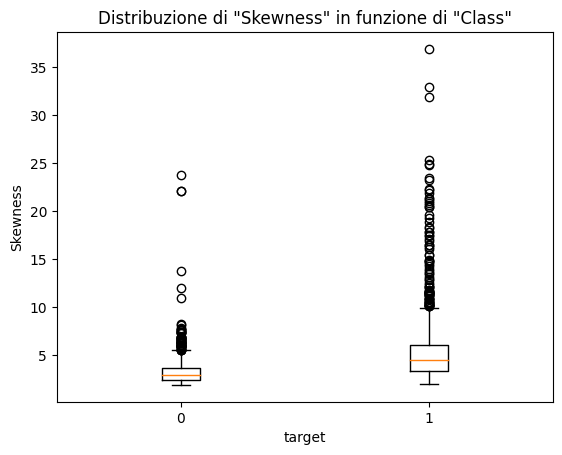

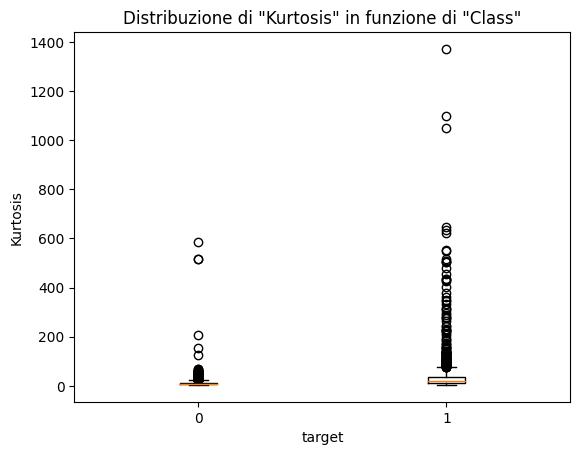

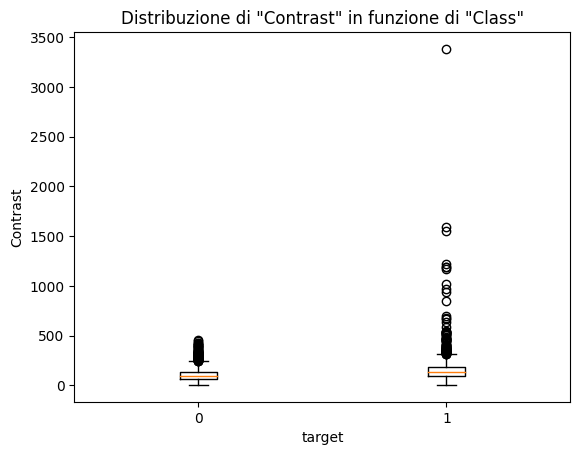

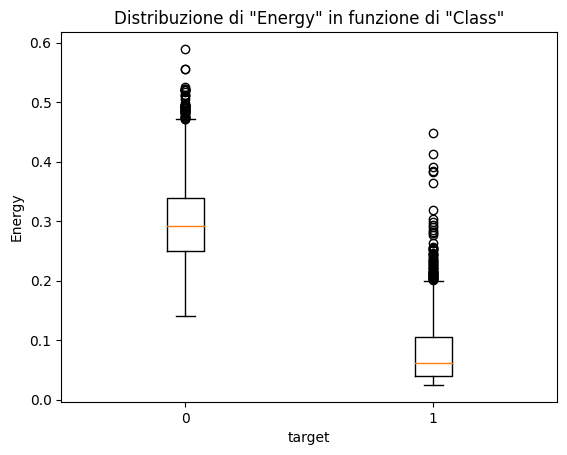

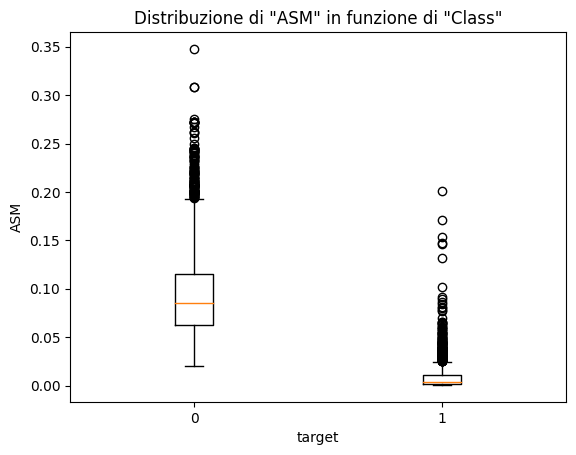

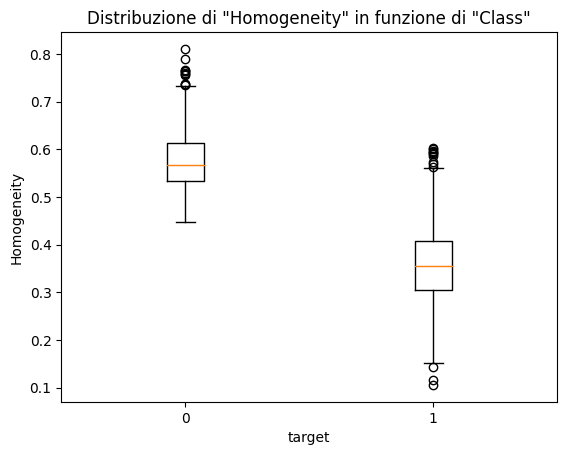

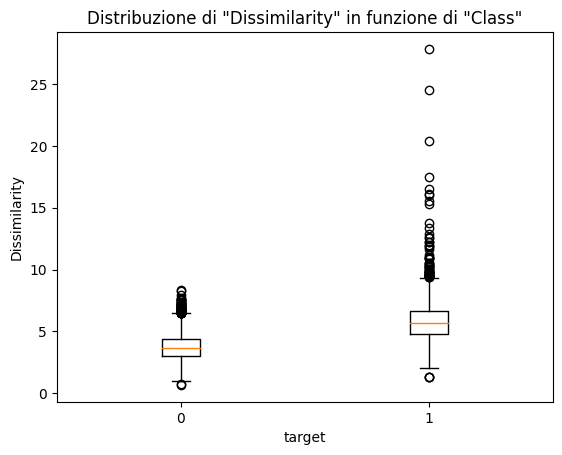

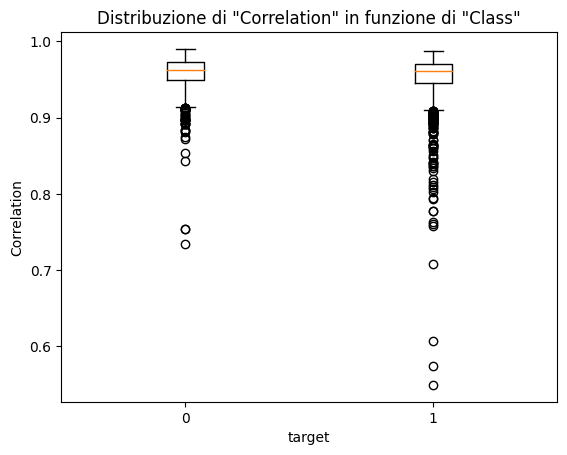

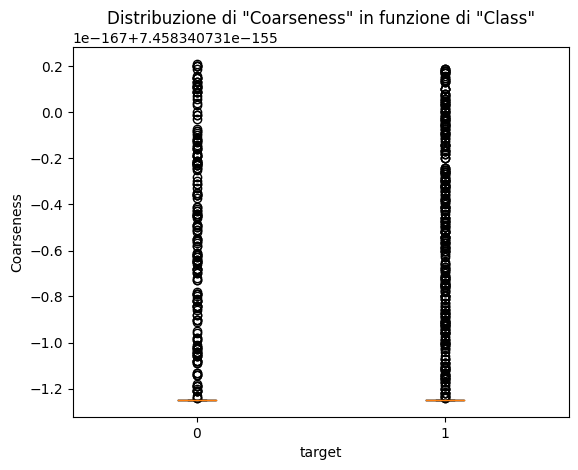

In [27]:
for col_name in df.columns[2:]:
    data_to_plot = {
        '0': df[df['Class'] == 0][col_name],
        '1': df[df['Class'] == 1][col_name],
    }

    # Crea il grafico a boxplot
    fig, ax = plt.subplots()
    ax.boxplot(data_to_plot.values())
    ax.set_xticklabels(data_to_plot.keys())
    ax.set_ylabel(col_name)
    ax.set_xlabel('target')
    plt.title("Distribuzione di \"" + col_name + "\" in funzione di \"Class\"")
    plt.show()

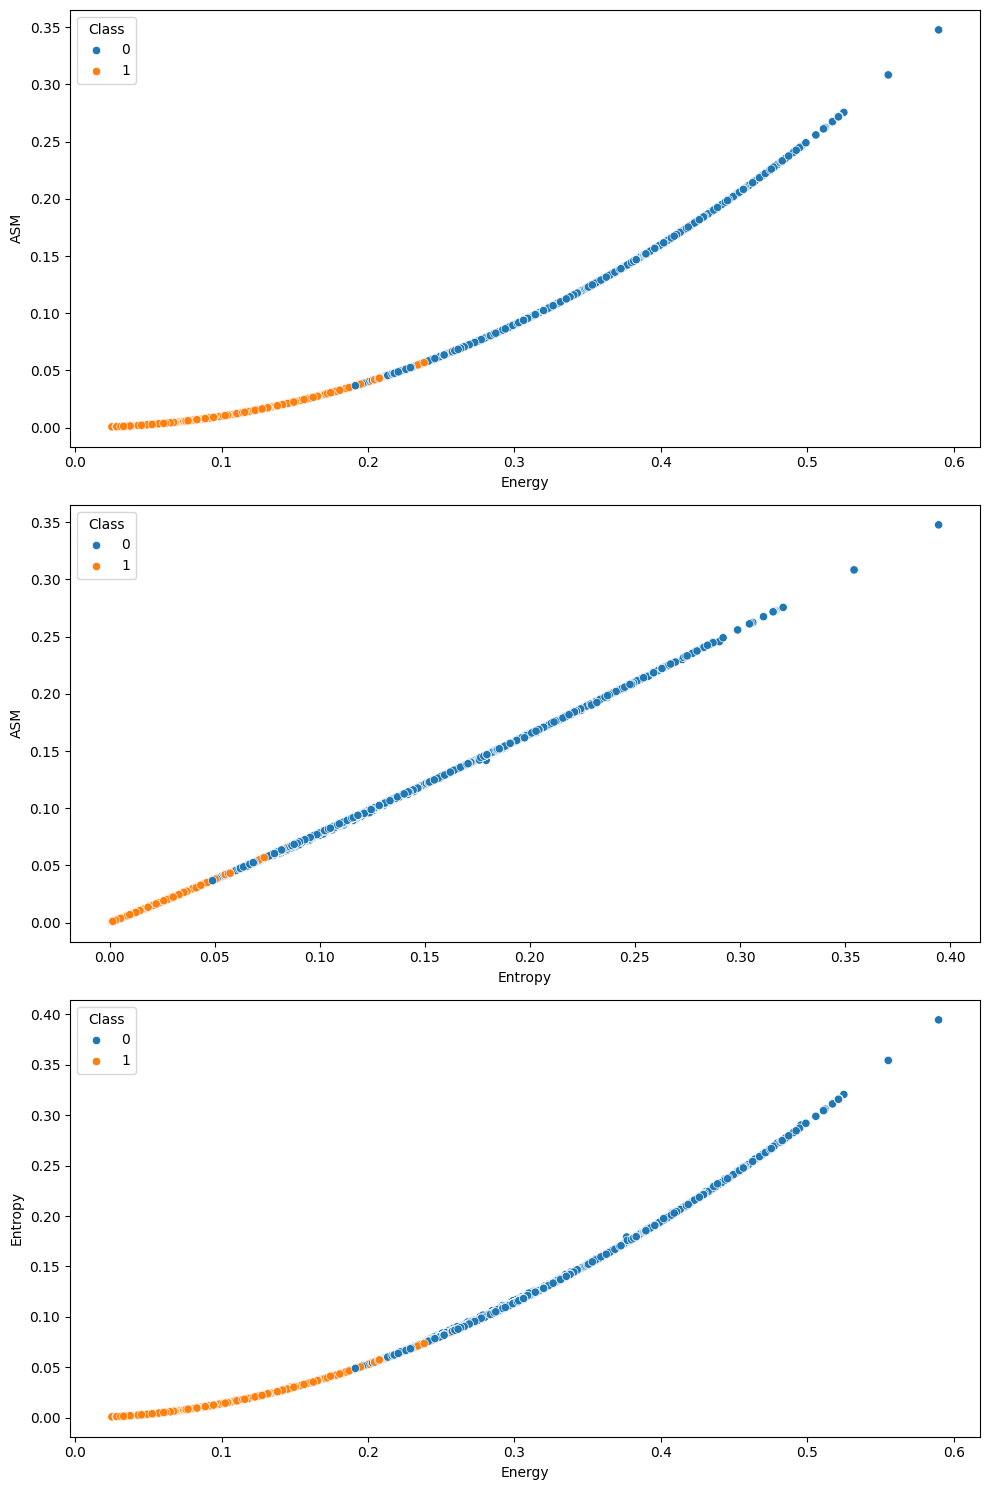

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

ax = axes[0]
ax = sns.scatterplot(x=df["Energy"], y=df["ASM"], hue = df["Class"], ax=ax)

ax = axes[1]
ax = sns.scatterplot(x=df["Entropy"], y=df["ASM"], hue = df["Class"], ax=ax)

ax = axes[2]
ax = sns.scatterplot(x=df["Energy"], y=df["Entropy"], hue = df["Class"], ax=ax)

plt.tight_layout()

plt.show()

BRUH SONO SUPER CORRELATE, PERÒ POTREMMO USARE UN PERCETTRONE